In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# question1-1 Download the monthly stock price data for 'YUM'
stock_ticker = 'YUM'
start_date = '2015-01-01'
end_date = '2019-12-31'
stock_data = yf.download(stock_ticker, start=start_date, end=end_date, interval='1mo')
stock_data = stock_data.dropna()
stock_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


Date
2015-01-01     44.057095
2015-02-01     49.720020
2015-03-01     48.254974
2015-04-01     52.693047
2015-05-01     55.527767
2015-06-01     55.509274
2015-07-01     54.079651
2015-08-01     49.376095
2015-09-01     49.487530
2015-10-01     43.891930
2015-11-01     45.179283
2015-12-01     45.515743
2016-01-01     45.092049
2016-02-01     45.454906
2016-03-01     51.338268
2016-04-01     49.901924
2016-05-01     51.779102
2016-06-01     52.302631
2016-07-01     56.402561
2016-08-01     57.523117
2016-09-01     57.586510
2016-10-01     54.713848
2016-11-01     56.237465
2016-12-01     56.184246
2017-01-01     58.135998
2017-02-01     58.218479
2017-03-01     56.952866
2017-04-01     58.601742
2017-05-01     65.046951
2017-06-01     66.049889
2017-07-01     67.590088
2017-08-01     69.070152
2017-09-01     66.183968
2017-10-01     66.939247
2017-11-01     75.049286
2017-12-01     73.654007
2018-01-01     76.343498
2018-02-01     73.446434
2018-03-01     77.186790
2018-04-01     78.97

In [3]:
#question1-2 Calculate monthly logarithmic returns
stock_data['Log_Returns'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
stock_data['Log_Returns']
# Calculate annualized return
annualized_return = stock_data['Log_Returns'].mean() * 12
print(f'Annualized Return: {annualized_return * 100:.2f}%')

Annualized Return: 15.42%


In [4]:
#question1-3 Calculate annualized volatility
annualized_volatility = stock_data['Log_Returns'].std() * np.sqrt(12)
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Volatility: 17.49%


In [5]:
#question1-4 Download the ESG data
import yesg
ESG = yesg.get_historic_esg(stock_ticker)
# Fill missing values
ESG.fillna(method='ffill', inplace=True)
# Merge with stock data (same timeline)
merged_data = pd.merge(stock_data, ESG, on='Date')
# Get the ESG total score for 'YUM'
ESG_data = merged_data['Total-Score']
ESG_data

Date
2015-01-01    58.00
2015-02-01    58.00
2015-03-01    59.00
2015-04-01    59.00
2015-05-01    59.00
2015-06-01    57.00
2015-07-01    57.00
2015-08-01    57.00
2015-09-01    57.00
2015-10-01    57.00
2015-11-01    57.00
2015-12-01    57.00
2016-01-01    57.42
2016-02-01    57.72
2016-03-01    57.72
2016-04-01    55.42
2016-05-01    55.42
2016-06-01    55.68
2016-07-01    55.68
2016-08-01    53.97
2016-09-01    53.97
2016-10-01    53.97
2016-11-01    53.97
2016-12-01    53.97
2017-01-01    53.97
2017-02-01    53.97
2017-03-01    53.97
2017-04-01    53.97
2017-05-01    53.47
2017-06-01    53.47
2017-07-01    53.47
2017-08-01    53.97
2017-09-01    53.97
2017-10-01    53.58
2017-11-01    52.77
2017-12-01    52.77
2018-01-01    52.77
2018-02-01    52.77
2018-03-01    53.69
2018-04-01    53.32
2018-05-01    53.32
2018-06-01    53.32
2018-07-01    53.32
2018-08-01    53.32
2018-09-01    53.32
2018-10-01    53.32
2018-11-01    57.70
2018-12-01    57.96
2019-01-01    57.96
2019-02-01    5

<Axes: xlabel='Date'>

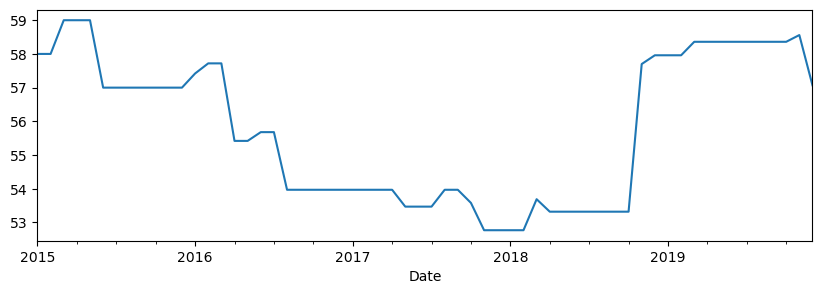

In [6]:
# Plotting the ESG data
ESG_data.plot(figsize=(10, 3))

In [7]:
#question1-5 Calculate the correlation coefficient
correlation = merged_data['Adj Close'].corr(merged_data['Total-Score'])
print(f'correlation: {correlation:.2f}')

correlation: 0.14


In [8]:
### Question 2
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [9]:
# the month of my birth
start = datetime(2022, 6, 1)
end = datetime(2022, 6, 30)
#The geographical coordinates (latitude, longitude, and altitude) for Shanghai
location = Point(31.2304, 121.4737, 4)
# download the daliy data of Shanghai
data = Daily(location, start, end)
data = data.fetch()
# Calculate the cdd
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]
total_cdd = sum(cdds)
total_cdd

264.1